***Preferencias en el Uso de Canales***

# ***Experimientos e iteraciones con los modelos iniciales***
Por Tatiana Molina - Carolina Alvarez

Una vez se realizó la limpieza de los datos la información resultante fue almacenada en un repositorio de Google Cloud para mejorar el rendimiento de la ejecucion de cada notebook para las siguientes ejecuciones.

# **1. Consultar la base de datos de contactos y clientes**

Realizamos una lectura de los datos del repositorio para consultas de la organización (Google Cloud), al tratarse de datos confidenciales no es posible ejecutar estas celdas desde fuentes externas.

En este caso realizamos la consulta de la información resultante de la limpeiza de datos, sin embargo esta consulta se organizó para incluir unicamente el canal de contacto mas frecuente para cada cliente, esto dado que se identificó en las hiteraciones anteriores que un cliente podia tener varias contacto a traves de diferentes canales y por tanto esto puedia estar afectando el desempeño del modelo.

Se omitan la conexión y query a la base de datos por contener información sensible

In [ ]:
from google.cloud import bigquery

In [ ]:
client = bigquery.Client(location="US")

In [ ]:
query = """
SELECT 

 """
query_job = client.query(query, location="US",) # API request - starts the query

In [ ]:
df = query_job.to_dataframe()

In [ ]:
#Cambiemos el tipo de datos de las variables para poder usar un codificación Label Encoder

df['descTema'] = df['descTema'].astype('str')
df['descCanalRadicacion'] = df['descCanalRadicacion'].astype('str')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].astype('str')
df['descCicloVida'] = df['descCicloVida'].astype('str')
df['descOcupacion'] = df['descOcupacion'].astype('str')
df['descRegional'] = df['descRegional'].astype('str')

# Recordemos información de la variable a predecir.
Es importante recordar que presenta un desbalance fuerte concentrado en 3 valores.

In [ ]:
df['descCanalRadicacion'].unique()

array(['LINEA DE SERVICIO', 'OFICINA DE SERVICIO', 'GESTIÓN DOCUMENTAL',
       'OFICINA VIRTUAL', 'PORTAL  WEB', 'CHAT ASESOR',
       'ESTRUCTURA COMERCIAL'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Canal de contacto')

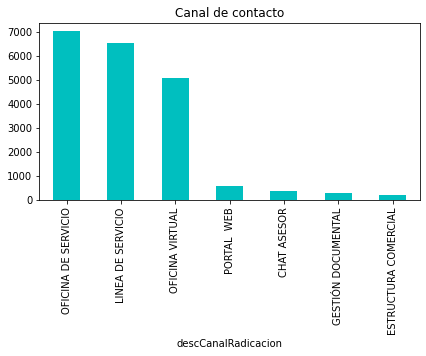

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
df.groupby(df['descCanalRadicacion']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'c')
plt.title('Canal de contacto')

### **2. CODIFICAR VARAIBLES**

In [ ]:
# Codificación de las variables

from sklearn.preprocessing import LabelEncoder # Codificación de etiquetas
LE = LabelEncoder()
df2 = df[['afi_hash64','descTema','descSexo', 'descSegmentoAfiliado', 'edadAfiliado', 
          'EstadoPO', 'EstadoPV', 'EstadoCES', 'ultimoIBC','IndicadorUsaClave', 'idAfiliadoTieneClave', 'TieneEmail',
          'descCicloVida','descOcupacion', 'descRegional' , 'descCanalRadicacion']]

df2 = df2[df2.descCanalRadicacion.isin(['LINEA DE SERVICIO', 'OFICINA DE SERVICIO', 'OFICINA VIRTUAL'])]

df2['afi_hash64'] = LE.fit_transform(df2['afi_hash64'])
df2["descTema"] = LE.fit_transform(df2['descTema'])
df2["descSexo"] = LE.fit_transform(df2['descSexo'])
df2["descSegmentoAfiliado"] = LE.fit_transform(df2['descSegmentoAfiliado'])
df2["EstadoPO"] = LE.fit_transform(df2['EstadoPO'])
df2["EstadoPV"] = LE.fit_transform(df2['EstadoPV'])
df2["EstadoCES"] = LE.fit_transform(df2['EstadoCES'])
df2["descCanalRadicacion"] = LE.fit_transform(df2['descCanalRadicacion'])
df2["IndicadorUsaClave"] = LE.fit_transform(df2['IndicadorUsaClave'])
df2["idAfiliadoTieneClave"] = LE.fit_transform(df2['idAfiliadoTieneClave'])
df2["descCicloVida"] = LE.fit_transform(df2['descCicloVida'])
df2["TieneEmail"] = LE.fit_transform(df2['TieneEmail'])
df2["descOcupacion"] = LE.fit_transform(df2['descOcupacion'])
df2["descRegional"] = LE.fit_transform(df2['descRegional'])

In [ ]:
# Eliminamos los registros de clientes que de acuerdo con el conocimiento del negocio no nos contactan normalmente

df3 = df2.drop(df.index[ (df['edadAfiliado'] > 90) & (df['edadAfiliado'] < 18)])

### **3. NORMALIZAR VARAIBLES**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


scaler = MinMaxScaler()
scaler.fit(df3.iloc[:,1:15])
df4= scaler.transform(df3.iloc[:,1:15])
df4 = pd.DataFrame(df4, columns =  ['descTema','descSexo', 'descSegmentoAfiliado', 'edadAfiliado', 
          'EstadoPO', 'EstadoPV', 'EstadoCES', 'ultimoIBC','IndicadorUsaClave', 'idAfiliadoTieneClave', 'TieneEmail',
          'descCicloVida','descOcupacion', 'descRegional' ])


In [ ]:
#Correlación entre las varibales predictora y con la variable objetivo:

df3.corr()

,afi_hash64,descTema,descSexo,descSegmentoAfiliado,edadAfiliado,EstadoPO,EstadoPV,EstadoCES,ultimoIBC,IndicadorUsaClave,idAfiliadoTieneClave,TieneEmail,descCicloVida,descOcupacion,descRegional,descCanalRadicacion
afi_hash64,1.000000,0.000921,0.006476,0.015998,-0.017859,-0.019553,-0.003990,-0.019335,-0.009754,-0.004510,-0.008732,-0.006302,-0.024888,-0.006396,0.009739,-0.004556
descTema,0.000921,1.000000,-0.006655,0.128358,-0.225750,-0.005191,-0.143367,-0.226772,0.118572,0.047361,0.065005,0.031237,0.047206,-0.028479,-0.066557,-0.114974
descSexo,0.006476,-0.006655,1.000000,-0.034681,0.066464,0.035745,0.012288,-0.000232,0.030905,-0.012108,-0.046826,-0.070833,-0.150841,-0.007880,0.064962,0.035853
descSegmentoAfiliado,0.015998,0.128358,-0.034681,1.000000,-0.323231,-0.509619,-0.123304,-0.407262,-0.022295,0.028931,0.055793,0.157426,0.154728,-0.026005,0.004982,-0.185538
edadAfiliado,-0.017859,-0.225750,0.066464,-0.323231,1.000000,0.382030,-0.075436,0.278545,0.036928,0.025242,0.063862,-0.029037,-0.332019,-0.013828,0.058635,0.249249
EstadoPO,-0.019553,-0.005191,0.035745,-0.509619,0.382030,1.000000,-0.139584,0.115706,0.081193,0.047974,0.086317,-0.030398,-0.211401,-0.050651,-0.021653,0.221725
EstadoPV,-0.003990,-0.143367,0.012288,-0.123304,-0.075436,-0.139584,1.000000,0.019011,-0.307496,-0.140597,-0.203327,-0.099428,0.068771,0.115563,0.073972,-0.070290
EstadoCES,-0.019335,-0.226772,-0.000232,-0.407262,0.278545,0.115706,0.019011,1.000000,-0.067708,-0.090868,-0.161055,-0.092382,-0.121150,0.069684,0.073197,0.100319
ultimoIBC,-0.009754,0.118572,0.030905,-0.022295,0.036928,0.081193,-0.307496,-0.067708,1.000000,0.152508,0.178588,0.063557,-0.018613,-0.072418,-0.032638,0.014594
IndicadorUsaClave,-0.004510,0.047361,-0.012108,0.028931,0.025242,0.047974,-0.140597,-0.090868,0.152508,1.000000,0.568699,0.121433,0.006724,-0.106244,-0.085384,0.022481


Nos interesan las correlaciones entre varibales predictoras inferiores a 0.7 ya que una correlación mayor puede indicar que las varibales no estan proporcionando información adicional al modelo, en este caso las variables son completamente independientes por lo tanto las conservamos todas.

Entre las variables predictoras se puede notar que la mayor correlación esta entre estado de Cesantias con el segmento y con la edad del afiliado y el estado en PO que también influye en el segmento del afiliado.

## **4. Ajuste de Modelos**

### **4.1 Separación de datos de entrenamiento**

In [ ]:
#Separacion en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df4,df3["descCanalRadicacion"], 
                                                    test_size=0.2, random_state=10, stratify =df3["descCanalRadicacion"] )

### **4.2 Modelos inciales**
Los modelos probados durante este ciclo de iteración son: 
- Discriminante cuadrátido
- Naive bayes ingenuo
- Regresión logística

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
#Instancia de modelos entrenados con datos parámetros por defecto entregados por la libreria sklearn
clfQD = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
clfNB = GaussianNB().fit(X_train, y_train)
clfLR = LogisticRegression().fit(X_train, y_train)

#### **3.2.1 Métricas de los modelos**
Se inicia con el accuray score y el balance accuracy para tener en cuenta el desbalance de los datos

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [ ]:
labels = ['QD', 'NB', 'LR']
Performance = []
Performance.append([accuracy_score(y_test,clfQD.predict(X_test)), accuracy_score(y_test,clfNB.predict(X_test)), 
                    accuracy_score(y_test,clfLR.predict(X_test))])
Performance.append([balanced_accuracy_score(y_test,clfQD.predict(X_test)), balanced_accuracy_score(y_test,clfNB.predict(X_test)), 
                    balanced_accuracy_score(y_test,clfLR.predict(X_test))])

In [ ]:
print ("El accuracy para los modelos QD, NB, LR respectivamente es:" , Performance[0])
print ("El Balance accuracy para los modelos QD, NB, LR respectivamente es:" , Performance[1])


El accuracy para los modelos QD, NB, LR respectivamente es: [0.49234076861058856, 0.4821284600913733, 0.5165278151034668]
El Balance accuracy para los modelos QD, NB, LR respectivamente es: [0.48407881335023695, 0.4748011338083831, 0.49135493468441654]


### **4.3 Modelos no parametricos**
Teniendo en cuenta el bajo rendimiento de los modelos inicial, se opta por modelos un poco más complejos con hiperparámetros que pueden ajsutarse para mejorar el resultado. 
En este caso los modelos probados son:
* KNN
* Random forest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Instancia entrenada del modelo KNN con hiperparámetros por defecto
clfKNN = KNeighborsClassifier().fit(X_train, y_train)

In [ ]:
# Para este modelo se calculan las mismas métricas mejorando el resultado sustancialmente
acc_knn = accuracy_score(y_test,clfKNN.predict(X_test))
bacc_knn = balanced_accuracy_score(y_test,clfKNN.predict(X_test))
print ("El accuracy para el modelo KNN e es:" , acc_knn)
print ("El Balance accuracy para el modelo KNN es:" , bacc_knn)

El accuracy para el modelo KNN e es: 0.6057511421660844
El Balance accuracy para el modelo KNN es: 0.5986401359323895


In [ ]:
# Instanacia del modelo para 30 vecinos más cercanos

clfKNN2 = KNeighborsClassifier(n_neighbors=30,weights ='distance').fit(X_train, y_train)

In [ ]:
# se calculan las mismas métricas con un resultado mucho mejor.
acc_knn = accuracy_score(y_test,clfKNN2.predict(X_test))
bacc_knn = balanced_accuracy_score(y_test,clfKNN2.predict(X_test))
print ("El accuracy para el modelo KNN e es:" , acc_knn)
print ("El Balance accuracy para el modelo KNN es:" , bacc_knn)

El accuracy para el modelo KNN e es: 0.6538564901908089
El Balance accuracy para el modelo KNN es: 0.6500054243314556


Teniendo en cuenta es desbalance del modelo se cambia la métrica a F1, esto también para considerar tanto el recall como la presición del modelo.
Se incluye una malla de hierparámetros para buscar la mejor combinación para el mejor modelo hasta el momento.
El costo computación para esta tarea es alto, por lo tanto los parámetros evaluados se limitan

In [ ]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

clf_KNN = KNeighborsClassifier()
parameters = { 'n_neighbors':[ 10, 20, 25,30, 35, 40,50 ], 'weights':[ 'uniform','distance']}

clfKNN3 = GridSearchCV(estimator= clf_KNN, param_grid=parameters,cv=5,  scoring= make_scorer(f1_score, average='weighted'))
clfKNN3.fit(X_train,y_train)
clfKNN3.best_estimator_

KNeighborsClassifier(n_neighbors=50, weights='distance')

In [ ]:
clfKNN3 = KNeighborsClassifier(n_neighbors=50,weights ='distance').fit(X_train, y_train)
acc_knn3 = accuracy_score(y_test,clfKNN3.predict(X_test))
bacc_knn3 = balanced_accuracy_score(y_test,clfKNN3.predict(X_test))
print ("El accuracy para el modelo KNN e es:" , acc_knn3)
print ("El Balance accuracy para el modelo KNN es:" , bacc_knn3)

El accuracy para el modelo KNN e es: 0.6613813490997044
El Balance accuracy para el modelo KNN es: 0.6566929265612352


El modelo de K vecinos más cercanos no mejora la métrica de manera significativa.

In [ ]:
# Entrenamiento de modelo Random forest
from sklearn.ensemble import RandomForestClassifier
clfRF = RandomForestClassifier(n_estimators=70, max_depth=8, random_state=0, class_weight='balanced_subsample')
clfRF = clfRF.fit(X_train, y_train)
accRF = accuracy_score(y_test, clfRF.predict(X_test))
baccDF = balanced_accuracy_score(y_test, clfRF.predict(X_test))

In [ ]:
print ("El accuracy para los modelo RF respectivamente es:" , accRF)
print ("El Balance accuracy para los modelo FR respectivamente es:" , baccDF)

El accuracy para los modelo RF respectivamente es: 0.6038699274388605
El Balance accuracy para los modelo FR respectivamente es: 0.5951937433514881


Hasta este punto, el mejor modelo sigue siendo el KNN

### **4.4 Maquina de soporte vectorial**
Se incluye grid search para búsqueda de mejores hiperparámetros

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score

parameters = { 'C':[ 0.01, 0.1, 10, ], 'gamma':[0.001, 0.01, 0.1,1]}

clfSVR = GridSearchCV(estimator= clf_b, param_grid=parameters,cv=5,  scoring='neg_mean_squared_error')
clfSVR.fit(X_train,y_train)
clfSVR.best_estimator_

SVR(C=10, gamma=0.1)

In [ ]:
from sklearn.svm import SVR
clfsvr1= SVR(kernel='rbf', C = 0.1, gamma = 0.005).fit(X_train, y_train)
clfSVR= SVR(kernel='rbf', C = 10, gamma = 0.1).fit(X_train, y_train)

### **5 Resumen de resultados obtenidos**

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
score_clfQD = [f1_score(y_test, clfQD.predict(X_test), average='weighted'), 
              recall_score(y_test, clfQD.predict(X_test), average='weighted'), 
               precision_score(y_test, clfQD.predict(X_test), average='weighted')]

score_clfNB = [f1_score(y_test, clfNB.predict(X_test), average='weighted'),
            recall_score(y_test, clfNB.predict(X_test), average='weighted'), 
               precision_score(y_test, clfNB.predict(X_test), average='weighted')]

score_clfLR = [f1_score(y_test, clfLR.predict(X_test), average='weighted'), 
                recall_score(y_test, clfLR.predict(X_test), average='weighted'), 
               precision_score(y_test, clfLR.predict(X_test), average='weighted')]

score_clKNN = [f1_score(y_test, clfKNN.predict(X_test), average='weighted'), 
                recall_score(y_test, clfKNN.predict(X_test), average='weighted'), 
               precision_score(y_test, clfKNN.predict(X_test), average='weighted')]

score_clKNN2 = [f1_score(y_test, clfKNN2.predict(X_test), average='weighted'), 
                recall_score(y_test, clfKNN2.predict(X_test), average='weighted'), 
               precision_score(y_test, clfKNN2.predict(X_test), average='weighted')]

score_clKNN3 = [f1_score(y_test, clfKNN3.predict(X_test), average='weighted'), 
                recall_score(y_test, clfKNN3.predict(X_test), average='weighted'), 
               precision_score(y_test, clfKNN3.predict(X_test), average='weighted')]

score_clfRF = [f1_score(y_test, clfRF.predict(X_test), average='weighted'), 
                recall_score(y_test, clfRF.predict(X_test), average='weighted'), 
               precision_score(y_test, clfRF.predict(X_test), average='weighted')]

score_clfsvr1 = [f1_score(y_test, clfsvr1.predict(X_test).astype('int64'), average='weighted'), 
                recall_score(y_test, clfsvr1.predict(X_test).astype('int64'), average='weighted'), 
               precision_score(y_test, clfsvr1.predict(X_test).astype('int64'), average='weighted')]

score_clfSVR = [f1_score(y_test, clfSVR.predict(X_test).astype('int64'), average='weighted'), 
                recall_score(y_test, clfSVR.predict(X_test).astype('int64'), average='weighted'), 
               precision_score(y_test, clfSVR.predict(X_test).astype('int64'), average='weighted')]

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Las métricas F1, Recalla y precision para cada uno de los modeles es: \nDiscriminante cuadrático: {}\nNaibe Bayes: {}\nRegresión lineal: {}\nKNN: {}\nKNN2: {}\nKNN3: {}\nRandom Forest: {}\nSVR: {}\nSVR2: {}'.format(score_clfQD, 
score_clfNB, score_clfLR, score_clKNN, score_clKNN2, score_clKNN3,score_clfRF, score_clfsvr1, score_clfSVR))

Las métricas F1, Recalla y precision para cada uno de los modeles es: 
Discriminante cuadrático: [0.4721497611580867, 0.49234076861058856, 0.5000871974298691]
Naibe Bayes: [0.45827743362441503, 0.4821284600913733, 0.48988656241927236]
Regresión lineal: [0.49237222856437074, 0.5165278151034668, 0.5108967392215683]
KNN: [0.60415685169804, 0.6057511421660844, 0.6085304283247263]
KNN2: [0.6533597745909685, 0.6538564901908089, 0.6551358377298276]
KNN3: [0.658195284912711, 0.6592313894114485, 0.6620944687381782]
Random Forest: [0.5963438759406744, 0.6038699274388605, 0.6133021418534428]
SVR: [0.3542367481117725, 0.4418167159365762, 0.3314792812373219]
SVR2: [0.3853861739897711, 0.4654662725073905, 0.5818036530637506]


# Mejor modelo inicial
El modelo KNN hasta este punto, el modelo KNN sigue generando los mejores resultados para el problema planteado, supernado incluso el SVR que es un modelo con mayor complejidad.